In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import files


In [3]:
uploaded=files.upload()

Saving auto.csv to auto (1).csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

####Import data

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df=pd.read_csv("auto.csv",names=headers)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.replace("?",np.nan,inplace = True)

In [8]:
missing_data=df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
for colunms in missing_data.columns.values.tolist():
  print(colunms)
  print(missing_data[colunms].value_counts())
  print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

In [10]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [11]:
df['normalized-losses'] = df['normalized-losses'].replace(np.nan,avg_norm_loss)


In [12]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [13]:
df['bore'] = df['bore'].replace(np.nan,avg_bore)

In [14]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [15]:
df['stroke'] = df['stroke'].replace(np.nan,avg_stroke)

In [16]:
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("Average of stroke:", avg_horsepower)

Average of stroke: 104.25615763546799


In [17]:
df['horsepower'] = df['horsepower'].replace(np.nan,avg_horsepower)

In [18]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [19]:
df['peak-rpm'] = df['peak-rpm'].replace(np.nan,avg_peakrpm)


In [20]:
df['num-of-doors'].value_counts()

,count
num-of-doors,
four,114
two,89


In [21]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [22]:
df['num-of-doors'] = df['num-of-doors'].replace(np.nan, "four")


In [23]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [24]:
df.reset_index(drop=True,inplace=True)

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [26]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [27]:
df[['bore','stroke']]=df[['bore','stroke']].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [28]:
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [29]:
df['city-L/100km']=235/df['city-mpg']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [30]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [31]:
df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()

In [32]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0, 0.5, 'count')

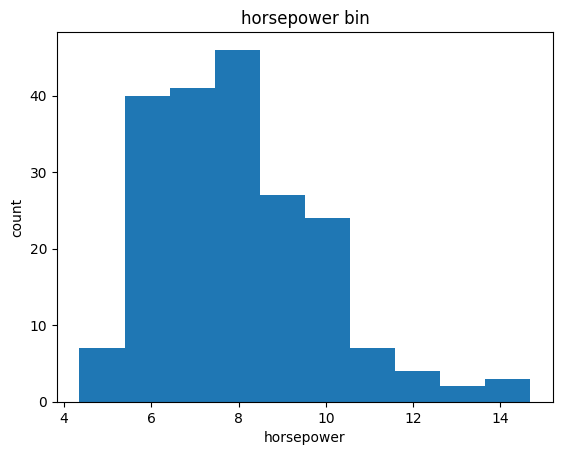

In [33]:

plt.hist(df['highway-L/100km'])
plt.title("horsepower bin")
plt.xlabel('horsepower')
plt.ylabel('count')

In [34]:
bins=np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [35]:
groups_name=['Low','medium','high']

In [36]:
df['horsepower_bins']=pd.cut(df['horsepower'],bins,labels=groups_name,include_lowest=True)
df[['horsepower_bins','horsepower']].head(20)


,horsepower_bins,horsepower
0,Low,111
1,Low,111
2,medium,154
3,Low,102
4,Low,115
5,Low,110
6,Low,110
7,Low,110
8,medium,140
9,Low,101


In [37]:
df['horsepower_bins'].value_counts()

,count
horsepower_bins,
Low,153
medium,43
high,5


Text(0.5, 1.0, 'horsepower bins')

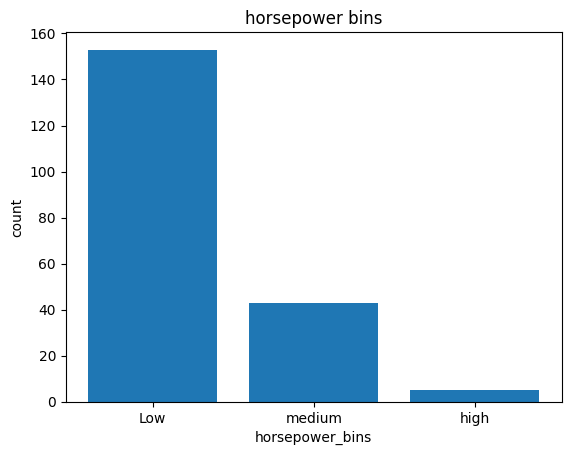

In [38]:
plt.bar(groups_name,df['horsepower_bins'].value_counts())
plt.xlabel("horsepower_bins")
plt.ylabel("count")
plt.title("horsepower bins")

In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower_bins'],
      dtype='object')

In [40]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


(0.0, 47670.0)

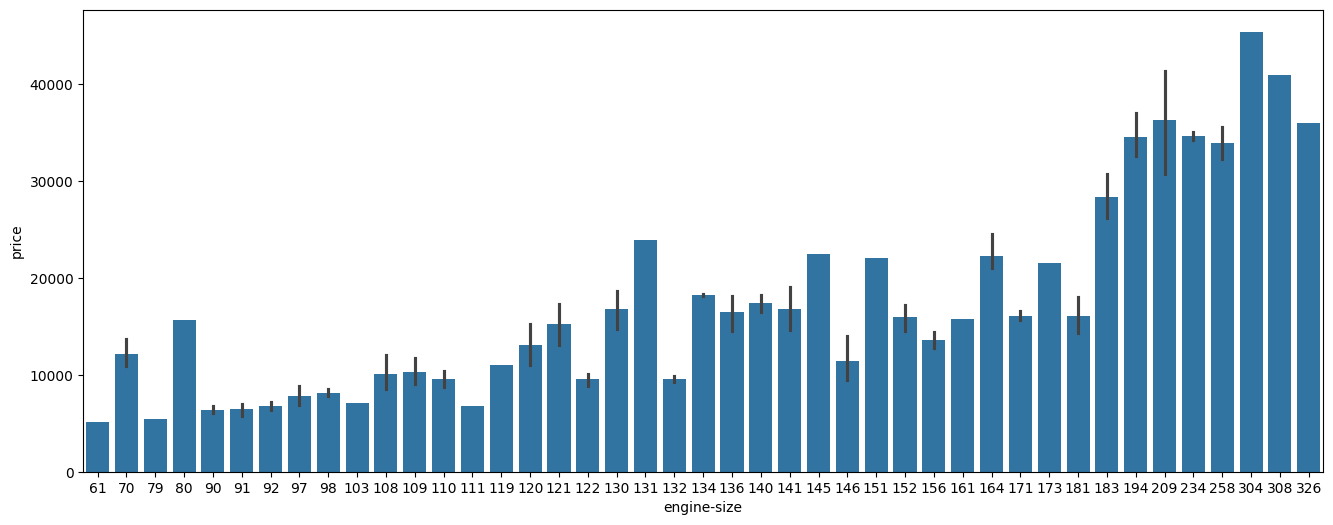

In [41]:
plt.figure(figsize=(16, 6))
sns.barplot(x="engine-size",y='price',data=df)
plt.ylim(0,)


In [42]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-L/100km', ylabel='price'>

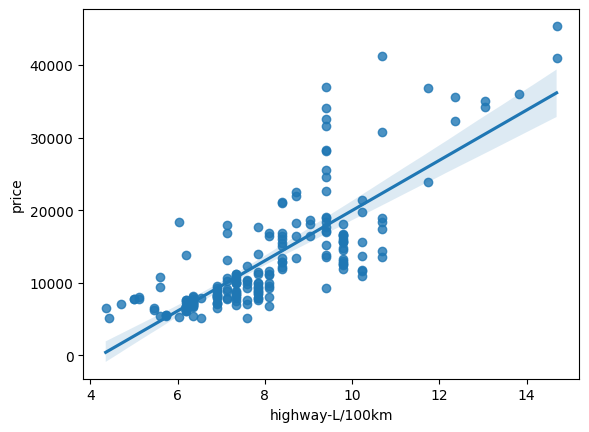

In [43]:
sns.regplot(x="highway-L/100km", y="price", data=df)

In [44]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


<Axes: xlabel='city-L/100km', ylabel='price'>

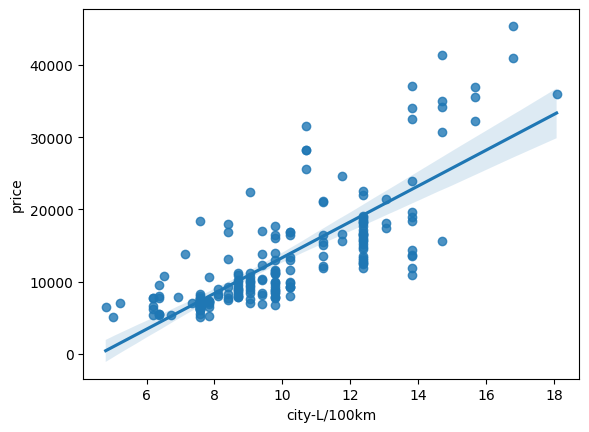

In [45]:
sns.regplot(x="city-L/100km", y="price", data=df)

In [46]:
df[['city-L/100km', 'price']].corr()

,city-L/100km,price
city-L/100km,1.000000,0.789898
price,0.789898,1.000000


In [47]:
df[['highway-L/100km','city-L/100km']].corr()

,highway-L/100km,city-L/100km
highway-L/100km,1.000000,0.958306
city-L/100km,0.958306,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

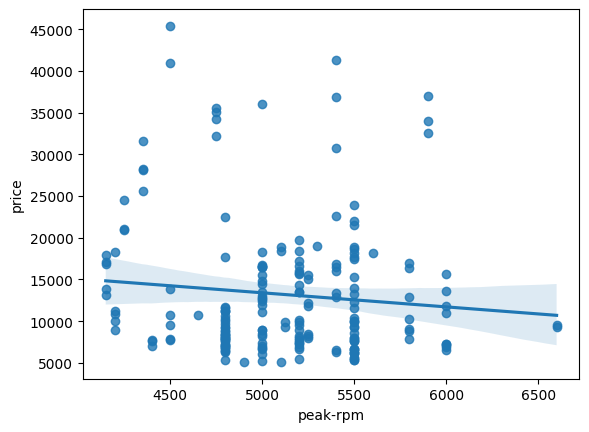

In [48]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [49]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='stroke', ylabel='price'>

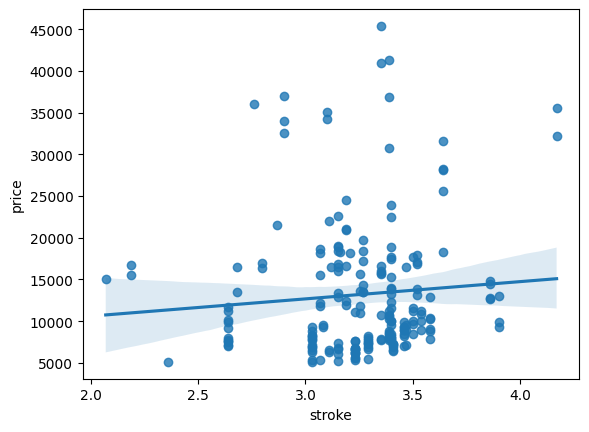

In [50]:
sns.regplot(x="stroke", y="price", data=df)

In [51]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


In [52]:
df['vehicle area']=df['length']*df['width']

<Axes: xlabel='vehicle area', ylabel='price'>

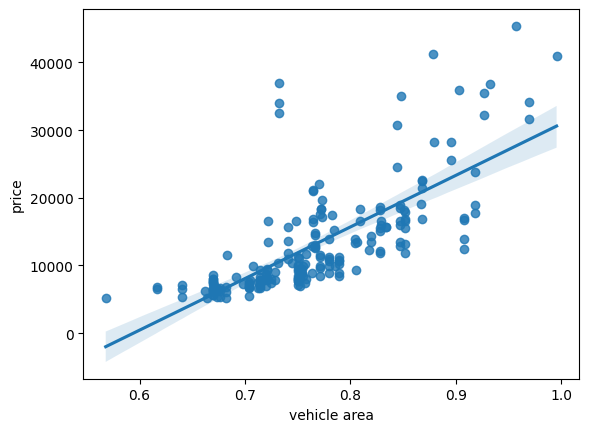

In [53]:
sns.regplot(x="vehicle area", y="price", data=df)

In [54]:
df[["vehicle area","price"]].corr()

,vehicle area,price
vehicle area,1.000000,0.737928
price,0.737928,1.000000


In [55]:
df['performance metric']=df['horsepower']*df['engine-size']

<Axes: xlabel='performance metric', ylabel='price'>

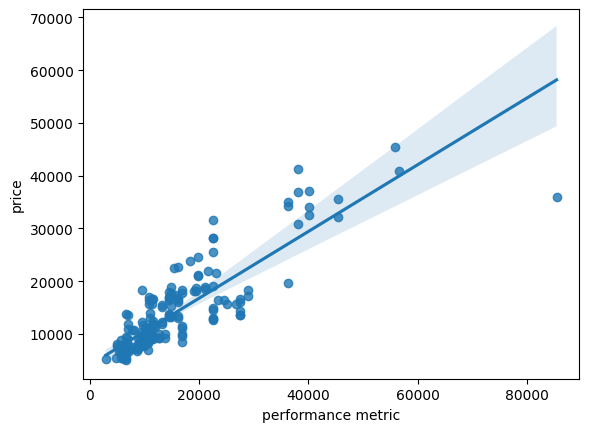

In [56]:
sns.regplot(x="performance metric", y="price", data=df)

In [57]:
df[["performance metric","price"]].corr()

,performance metric,price
performance metric,1.000000,0.864194
price,0.864194,1.000000


<Axes: xlabel='body-style', ylabel='price'>

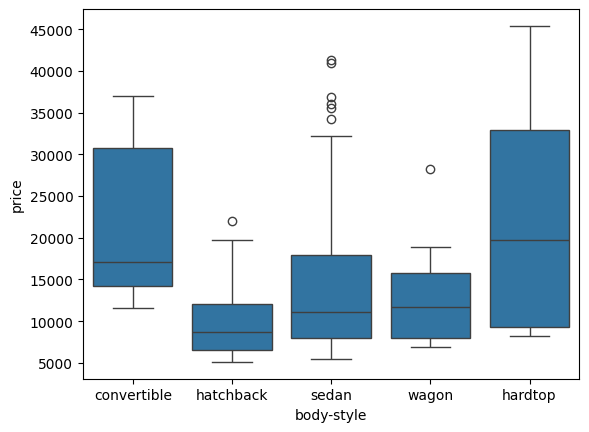

In [58]:
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

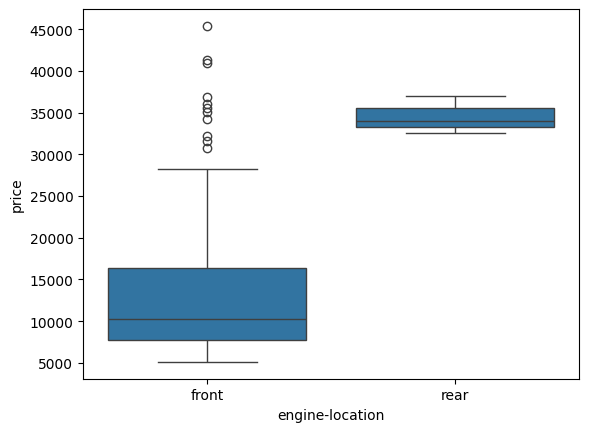

In [59]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

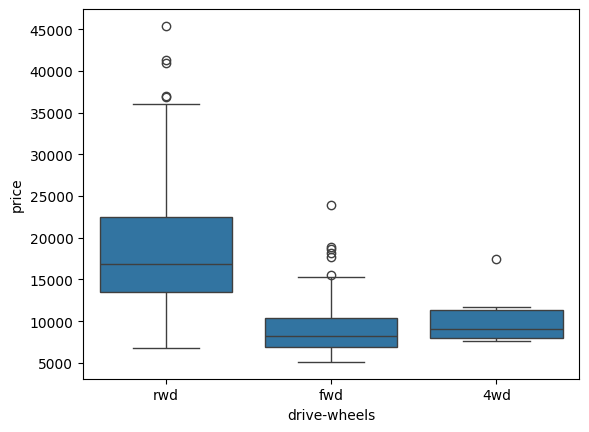

In [60]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [61]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,vehicle area,performance metric
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.767528,14390.094527
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.076969,10848.128494
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.567858,2928.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.714782,6860.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.755126,10908.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.819311,16936.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,0.995833,85412.000000


In [62]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


In [63]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [64]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [65]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [66]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [67]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [68]:
df_group_one=df[['drive-wheels','body-style','price']]

In [69]:
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [70]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [71]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [72]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [73]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


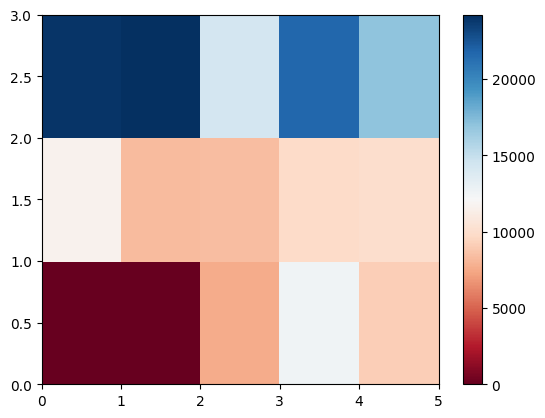

In [74]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

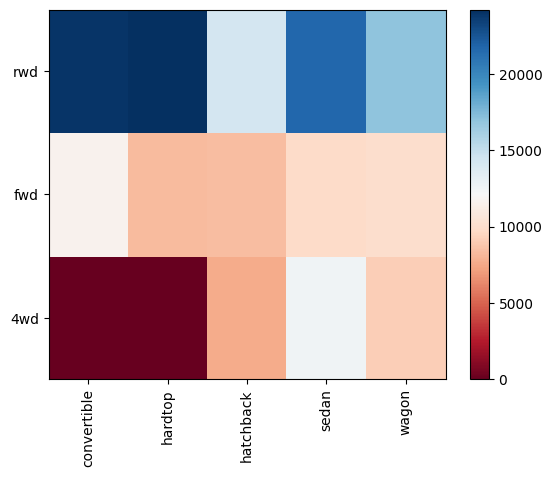

In [75]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [76]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


In [77]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650351e-48


In [78]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.01647746615924e-30


In [79]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048206e-38


In [80]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


In [81]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


In [82]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935315e-17


In [83]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


In [84]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is 0.8011176263981974  with a P-value of P =  3.0467845810414008e-46


In [85]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [86]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [87]:
grouped_test2.get_group('4wd')['price']

,price
4,17450.0
136,7603.0
140,9233.0
141,11259.0
144,8013.0
145,11694.0
150,7898.0
151,8778.0


In [88]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [89]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [90]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [91]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])

print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


In [92]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower_bins',
       'vehicle area', 'performance metric'],
      dtype='object')

vehicle area

performance metric

Engine-size

City-mpg

Highway-mpg

Wheel-base

Bore

Categorical variables:

Drive-wheels

In [93]:
import_variable= df[['vehicle area', 'performance metric', 'engine-size',
         'highway-L/100km', 'city-L/100km', 'wheel-base',
        'bore', 'drive-wheels']]

In [94]:
import_variable.head(5)

,vehicle area,performance metric,engine-size,highway-L/100km,city-L/100km,wheel-base,bore,drive-wheels
0,0.722147,14430,130,8.703704,11.190476,88.6,3.47,rwd
1,0.722147,14430,130,8.703704,11.190476,88.6,3.47,rwd
2,0.748412,23408,152,9.038462,12.368421,94.5,2.68,rwd
3,0.780269,11118,109,7.833333,9.791667,99.8,3.19,fwd
4,0.782626,15640,136,10.681818,13.055556,99.4,3.19,4wd


In [95]:
drive_wheels_dummies = pd.get_dummies(import_variable['drive-wheels'], prefix='drive-wheels',dtype=int)
drive_wheels_dummies.head(5)

,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [96]:
import_variable= pd.concat([import_variable, drive_wheels_dummies], axis=1)
import_variable.head(2)

,vehicle area,performance metric,engine-size,highway-L/100km,city-L/100km,wheel-base,bore,drive-wheels,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,0.722147,14430,130,8.703704,11.190476,88.6,3.47,rwd,0,0,1
1,0.722147,14430,130,8.703704,11.190476,88.6,3.47,rwd,0,0,1


In [97]:
# import_variable.drop(['horsepower_bins', 'drive-wheels'], axis=1, inplace=True)
import_variable.drop([ 'drive-wheels','drive-wheels_rwd'], axis=1, inplace=True)

In [98]:
import_variable.head(2)

,vehicle area,performance metric,engine-size,highway-L/100km,city-L/100km,wheel-base,bore,drive-wheels_4wd,drive-wheels_fwd
0,0.722147,14430,130,8.703704,11.190476,88.6,3.47,0,0
1,0.722147,14430,130,8.703704,11.190476,88.6,3.47,0,0


In [99]:
features=import_variable.columns


In [100]:
# features=['vehicle area', 'horsepower', 'curb-weight', 'engine-size',
#        'highway-L/100km', 'city-L/100km', 'wheel-base', 'bore',
#        'horsepower_bins_numeric', 'drive-wheels_4wd', 'drive-wheels_fwd',
#        'drive-wheels_rwd']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(import_variable[features])

In [101]:
y = df['price']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MSE: 28895184.020052996
R^2: 0.7638255321983523


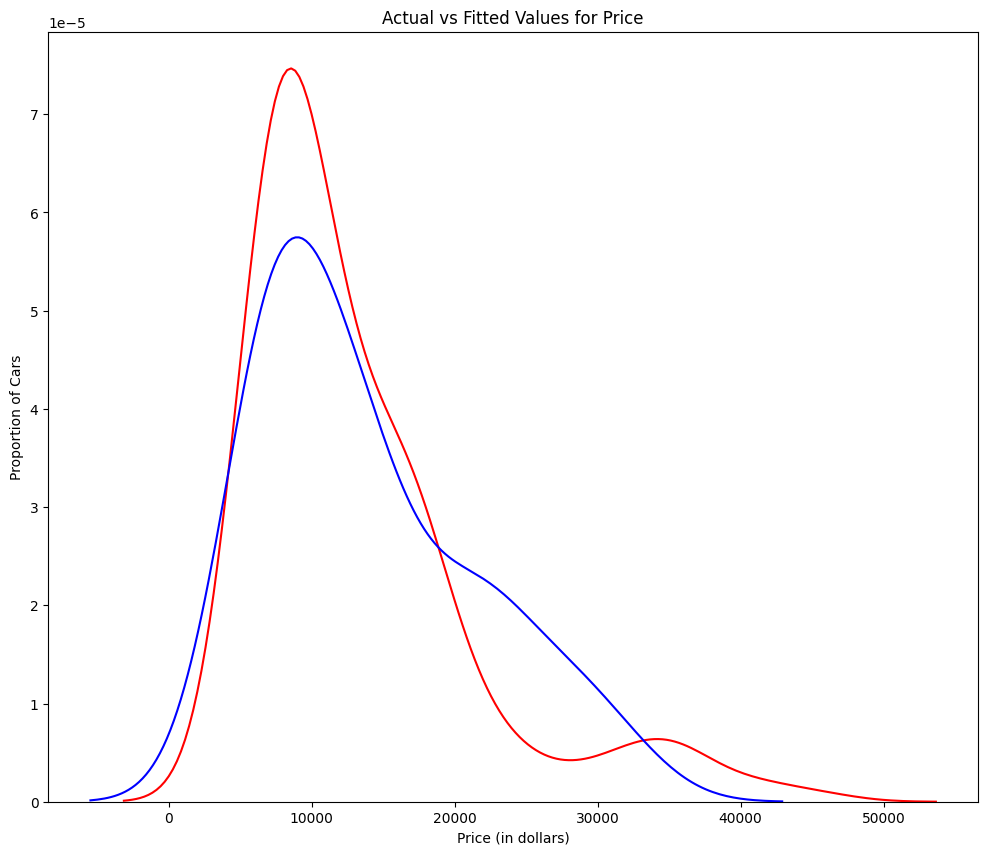

In [106]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-Validation R^2 Scores:", scores)
print("Average R^2:", scores.mean())


Cross-Validation R^2 Scores: [0.82987378 0.76456362 0.41465228 0.56478235 0.08539626]
Average R^2: 0.531853658181036


In [108]:
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(feature_importance)


              Feature  Coefficient
0        vehicle area   951.628045
1  performance metric  1273.614492
2         engine-size  2599.002316
3     highway-L/100km  -574.897784
4        city-L/100km  1960.910929
5          wheel-base   732.400664
6                bore  -607.704571
7    drive-wheels_4wd  -202.269559
8    drive-wheels_fwd -1112.696952


In [109]:
from sklearn.linear_model import Ridge, Lasso
ridge_model = Ridge(alpha=1.0).fit(X_train, y_train)
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)


In [110]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions using Ridge model
ridge_pred = ridge_model.predict(X_test)
print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R^2:", r2_score(y_test, ridge_pred))

# Predictions using Lasso model
lasso_pred = lasso_model.predict(X_test)
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("R^2:", r2_score(y_test, lasso_pred))


Ridge Regression:
MSE: 29074940.7933746
R^2: 0.7623562921947756
Lasso Regression:
MSE: 28897459.65689344
R^2: 0.7638069323057429


In [111]:
from sklearn.model_selection import cross_val_score

# Ridge Cross-Validation
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')
print("Ridge CV Scores:", ridge_cv_scores)
print("Ridge Average R^2:", ridge_cv_scores.mean())

# Lasso Cross-Validation
lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')
print("Lasso CV Scores:", lasso_cv_scores)
print("Lasso Average R^2:", lasso_cv_scores.mean())


Ridge CV Scores: [0.77076729 0.7597752  0.85619417 0.65965637 0.84915544]
Ridge Average R^2: 0.7791096940412506
Lasso CV Scores: [0.77026126 0.72403125 0.85673005 0.65215197 0.84635524]
Lasso Average R^2: 0.7699059561120066


In [112]:
from sklearn.model_selection import GridSearchCV

# Ridge Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1,10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge R^2:", ridge_grid.best_score_)

# Lasso Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Best Lasso R^2:", lasso_grid.best_score_)


Best Ridge Alpha: {'alpha': 10}
Best Ridge R^2: 0.7992981318256791
Best Lasso Alpha: {'alpha': 10}
Best Lasso R^2: 0.7721067837706287


In [113]:
# Final model training
final_model = ridge_grid.best_estimator_  # Replace with lasso_grid or original model if needed
final_model.fit(X_train, y_train)

# Predictions on unseen data
final_predictions = final_model.predict(X_test)


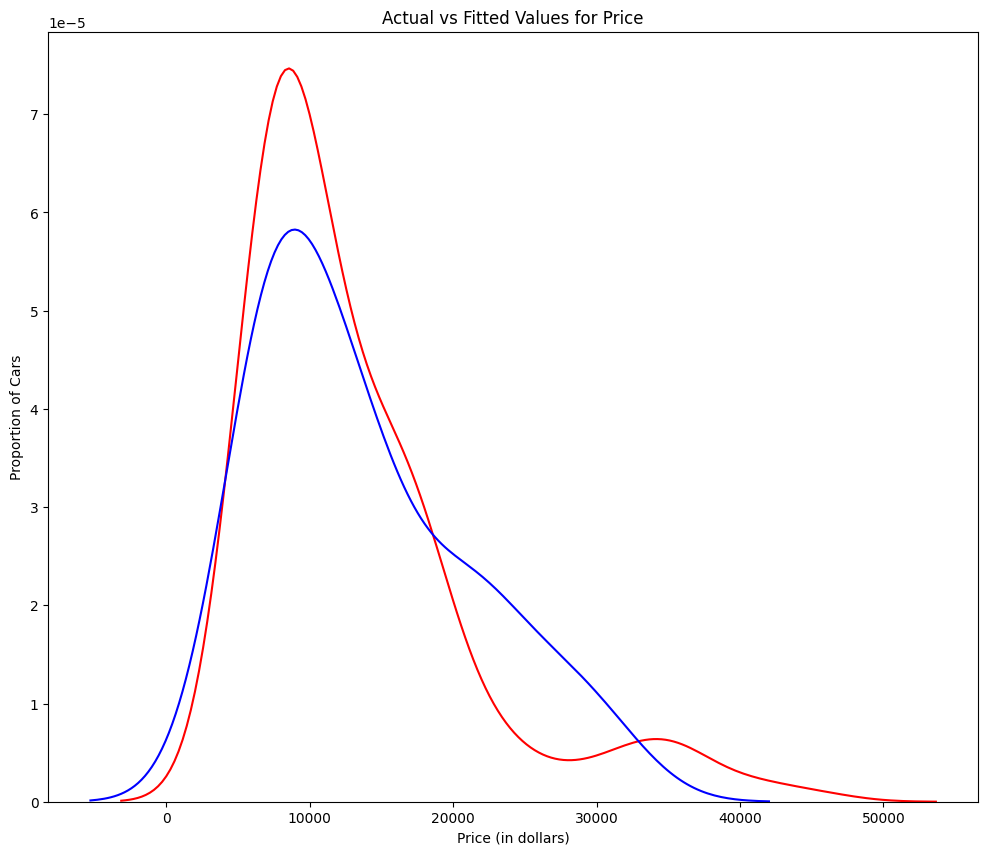

In [114]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(final_predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [120]:
# Create PolynomialFeatures object with the degree of the polynomial
degree = 3  # You can experiment with different degrees
poly = PolynomialFeatures(degree)

# Transform the features into polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [121]:
# Initialize the Linear Regression model
poly_reg_model = LinearRegression()

# Fit the model on the transformed training data
poly_reg_model.fit(X_train_poly, y_train)


LinearRegression()

In [122]:
# Predict using the test data
y_pred = poly_reg_model.predict(X_test_poly)


In [123]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 1.9220606126336212e+25
R^2 Score: -1.570994121221803e+17
